In [1310]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [1311]:
# --- global variables --- #

hbar = .658 # eV fs
c = 299.792 # nm fs{-1}

m0 = 5109980 # eV -> this is wrong there's an extra zero that should not be here
mu = .108 * m0 # eV

veps0 = 55.26 # e{2} eV{-1} nm{-1}
vepsS = 3.32
vepsW = 6.10

Lwell = 0.636 # nm
r0 = Lwell * (vepsW/(2*vepsS)) # nm

A = 1000/(8*(np.pi**2)*veps0*vepsS) # eV nm


In [1312]:
# --- simulation parameters --- #

k_max = .75
N = 500
dk = k_max/N

k_vals = np.linspace(dk, k_max, N)

th_max = 2*np.pi
Th = 250
dth = t_max/T

cos_vals = np.cos(np.linspace(dth, th_max, Th))

In [1313]:
def RytovaKeldysh(ki, kj): # Riemann sum over thetas

    q = np.sqrt(ki**2 + kj**2 - 2*ki*kj*cos_vals)
    Vl = 1/(q * (1 + r0*q))

    V = np.sum(Vl)

    return V * dth * A

In [1314]:
def Coulomb(): # Riemann sum of the kj components

    V = np.zeros((N, N))

    for i in range(N):
        for j in range(N):

            if i == j:
                V[i][j] = 0
            else:
                V[i][j] = dk * k_vals[j] * RytovaKeldysh(k_vals[i], k_vals[j])

    np.savetxt("Coulomb.txt", V, fmt="%.10f")

    return V

In [1315]:
def WannierMatrix(): # construction of the Wannier matrix

    K = np.diag( (c**2 * hbar**2 * k_vals**2)/(2 * mu) ) # eV

    H = K - Coulomb()

    np.savetxt("Hamiltonian.txt", H, fmt="%.10f")

    return H

In [1316]:
eigenvalues, eigenvectors = np.linalg.eig(WannierMatrix())
eigenvalues_SCP, eigenvectors_SCP = la.eig(WannierMatrix())

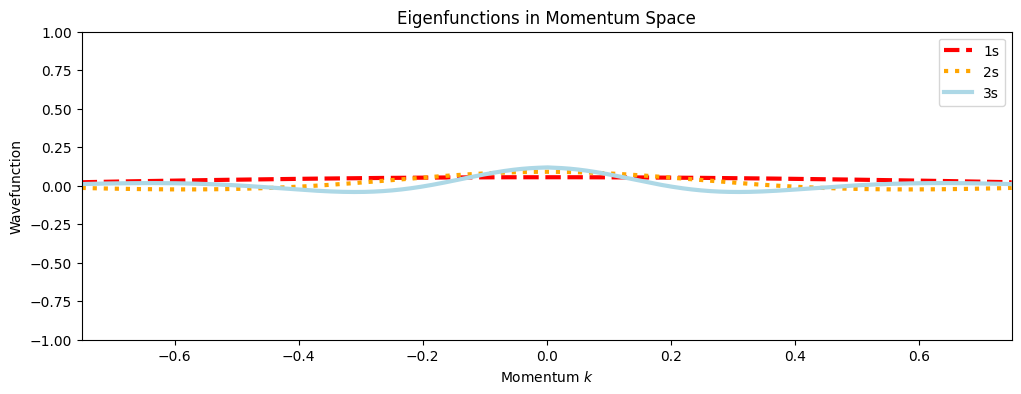

In [1335]:
plot_x = np.concatenate((np.flip((-1)*k_vals), k_vals))

plt.figure(figsize=(12,4))

plt.plot(plot_x, np.concatenate((np.flip(eigenvectors[:,0]),eigenvectors[:,0])), label=f'1s', c='red', linewidth=3, linestyle='--')
plt.plot(plot_x, np.concatenate((np.flip(eigenvectors[:,1]),eigenvectors[:,1])), label=f'2s', c='orange', linewidth=3, linestyle=':')
plt.plot(plot_x, np.concatenate((np.flip(eigenvectors[:,2]),eigenvectors[:,2])), label=f'3s', c='lightblue', linewidth=3)

plt.xlabel('Momentum $k$')
plt.xlim(-.75, .75)
plt.ylim(-1, 1)
plt.ylabel('Wavefunction')
plt.title('Eigenfunctions in Momentum Space')
plt.legend()
plt.show()

/Users/pedrobraga/Documents/Cambridge/wa_two/wa_two_env/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/pedrobraga/Documents/Cambridge/wa_two/wa_two_env/lib/python3.13/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


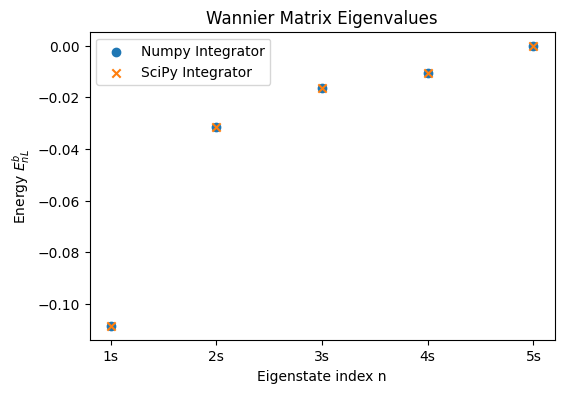

In [1333]:
plt.figure(figsize=(6,4))
plt.scatter(['1s', '2s' , '3s' , '4s', '5s'], eigenvalues[:5], label='Numpy Integrator')
plt.scatter(['1s', '2s' , '3s' , '4s', '5s'], eigenvalues_SCP[:5], label='SciPy Integrator', marker='x')
plt.xlabel('Eigenstate index n')
plt.ylabel('Energy $E_{nL}^b$')
plt.title('Wannier Matrix Eigenvalues')
plt.legend()
plt.show()

In [1319]:
eigenvalues[:5]

array([-1.08424553e-01, -3.13028525e-02, -1.65038808e-02, -1.04573387e-02,
       -8.07289456e-06])

In [1320]:
eigenvalues_SCP[:5]

array([-1.08424553e-01+0.j, -3.13028525e-02+0.j, -1.65038808e-02+0.j,
       -1.04573387e-02+0.j, -8.07289456e-06+0.j])